**Model parameters** are the properties of the training data that are learnt during training by the classifier or other ML models. In other words, parameters are those that are learnt by the machine like weights and biases.

**Model hyperparameters** are common for similar models and cannot be learnt during training but are set beforehand. In other words, hyperparameters are those which we supply to the neural network or  configuration that is external to the model and those value cannot be estimated from data. For example - number of hidden layers, input features, learning rate, activation functions, etc... 

(Model Desgin + Hyperparameters) = Model Parameters
* Model Design is the building blocks.
* Hyperparameters is the "knobs" that you can adjust (i.e. learning rate)
* Model Parameters are variables learned from the data (i.e. weights)

Basically, we do not know the best value for a model hyperparameter on a given problem. The best course of action is to, copy values used on other issues, or search for the best value by **trial and error**.

In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import *
from google.colab import files

%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TensorFlow 1.x selected.


In [2]:
uploaded = files.upload()
file_name = "heart.csv"

Saving heart.csv to heart.csv


### Reading Data and Prepare Dataset

In [3]:
import pandas as pd
dataset = pd.read_csv(file_name, delimiter=',')
print(dataset.shape)
dataset.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
# Shuffle the dataset
# NOTE: shuffle dataframe in-place and reset the index
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas Dataframe to Numpy dArray
dataset_np = dataset.values
X = dataset.drop('age', axis='columns').values
Y = dataset['age'].values

### Percent to Split

In [5]:
# Index for 30%
index_30percent = int(0.3 * len(dataset_np[:, 0]))
print(index_30percent)

90


### Normal Validation Dataset

In [0]:
# Split into training and validation
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]

XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

## Mean normalization
min = XTRAIN.min(axis = 0) 
max = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (max - min)
XVALID = (XVALID - mean) / (max - min)

## Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

In [0]:
def learning_curves(model_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(model_history.history['loss'])
    ax1.plot(model_history.history['val_loss'])
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend(['training loss data', 'validation loss data'], loc='upper right')

    ax2.plot(model_history.history['mean_absolute_error'])
    ax2.plot(model_history.history['val_mean_absolute_error'])
    ax2.set_ylabel('error')
    ax2.set_xlabel('epoch')
    ax2.legend(['training error data', 'validation error data'], loc='upper right')

    fig.show()

## Base Model
* This is base model with one hidden layer that has half the neuron of the previous top layer.

In [8]:
model = Sequential()
model.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Normal Dataset
model.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 2048, batch_size=100, verbose=0)

### Learning Curves of Base Model

90/90 [==============================] - 0s 113us/sample - loss: 0.0159 - mean_absolute_error: 0.1028
Last Val Loss: 0.015857139602303505
Last Val MAE: 0.10280429
{'batch_size': 100, 'epochs': 2048, 'steps': None, 'samples': 213, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']}


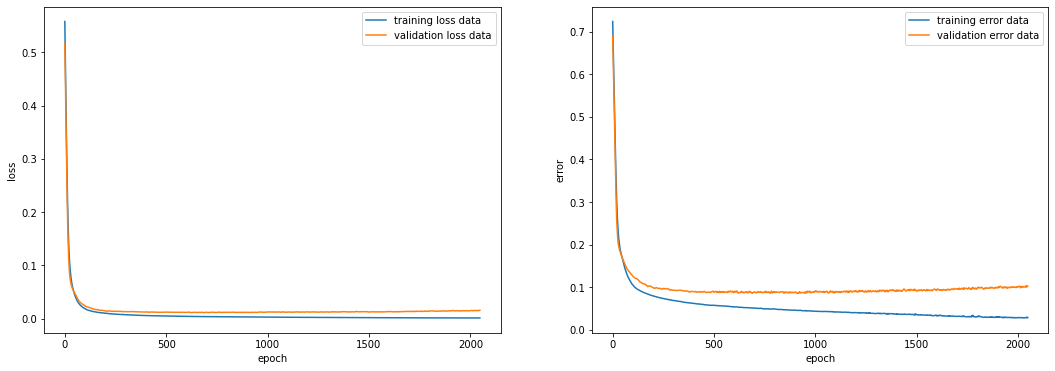

In [10]:
model.evaluate(XVALID, YVALID)
print("Last Val Loss: %s" % history.history['val_loss'][-1])
print("Last Val MAE: %s" % history.history['val_mean_absolute_error'][-1])
print(history.params)
learning_curves(history)

## More Hidden Layers (Alpha)
* This model hase two hidden layer and each hidden layer will have 1/4 the neuron of the previous top layer.

In [0]:
model1 = Sequential()
model1.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
model1.add(Dense(9, activation='relu'))
model1.add(Dense(6, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [0]:
# Normal Dataset
model1.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
history1 = model1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 2048, batch_size=100, verbose=0)

### Learning Curves of Alpha Model

90/90 [==============================] - 0s 111us/sample - loss: 0.0242 - mean_absolute_error: 0.1130
Last Val Loss: 0.024174276739358902
Last Val MAE: 0.11300625
{'batch_size': 100, 'epochs': 2048, 'steps': None, 'samples': 213, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']}


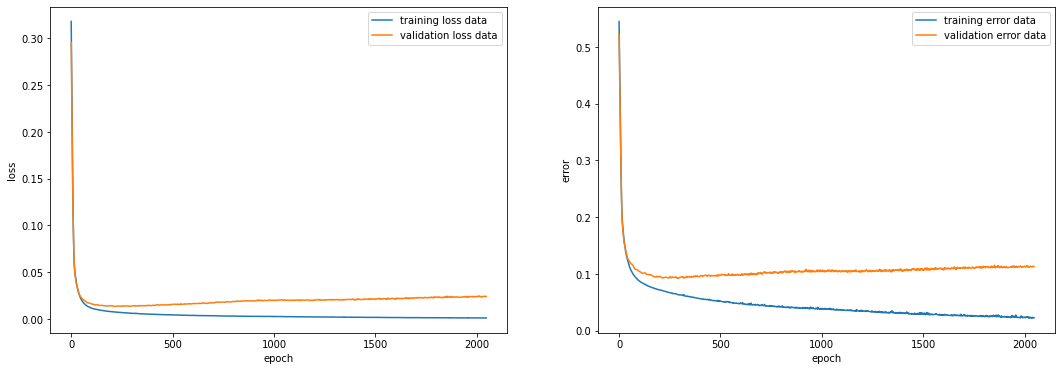

In [13]:
model1.evaluate(XVALID, YVALID)
print("Last Val Loss: %s" % history1.history['val_loss'][-1])
print("Last Val MAE: %s" % history1.history['val_mean_absolute_error'][-1])
print(history1.params)
learning_curves(history1)

## More Hidden Layers (Beta)
* This model hase three hidden layer and each hidden layer will have 1/4 the neuron of the previous top layer.

In [0]:
model2 = Sequential()
model2.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
model2.add(Dense(9, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [0]:
# Normal Dataset
model2.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
history2 = model2.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 2048, batch_size=100, verbose=0)

### Learning Curves of Beta Model

90/90 [==============================] - 0s 104us/sample - loss: 0.0251 - mean_absolute_error: 0.1268
Last Val Loss: 0.02511199377477169
Last Val MAE: 0.1268212
{'batch_size': 100, 'epochs': 2048, 'steps': None, 'samples': 213, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']}


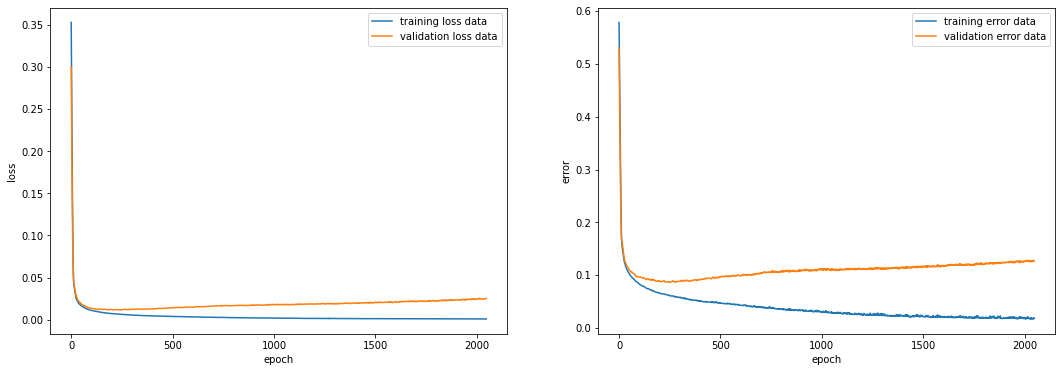

In [16]:
model2.evaluate(XVALID, YVALID)
print("Last Val Loss: %s" % history2.history['val_loss'][-1])
print("Last Val MAE: %s" % history2.history['val_mean_absolute_error'][-1])
print(history2.params)
learning_curves(history2)

## Different Approach
* More hidden layers does seem to improve the overall performance (but not always, depend on randomization). Let try adjusting the number of neurons while maintaining only one hidden layer.

## Model A 
* Hidden layers have the same number of the neuron as the previous layer.

In [0]:
modelA = Sequential()
modelA.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelA.add(Dense(13, activation='relu'))
modelA.add(Dense(1, activation='linear'))

In [0]:
# Normal Dataset
modelA.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyA = modelA.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 2048, batch_size=100, verbose=0)

### Learning Curves of Model A

90/90 [==============================] - 0s 125us/sample - loss: 0.0210 - mean_absolute_error: 0.1145
Last Val Loss: 0.0210258886218071
Last Val MAE: 0.11447628
{'batch_size': 100, 'epochs': 2048, 'steps': None, 'samples': 213, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']}


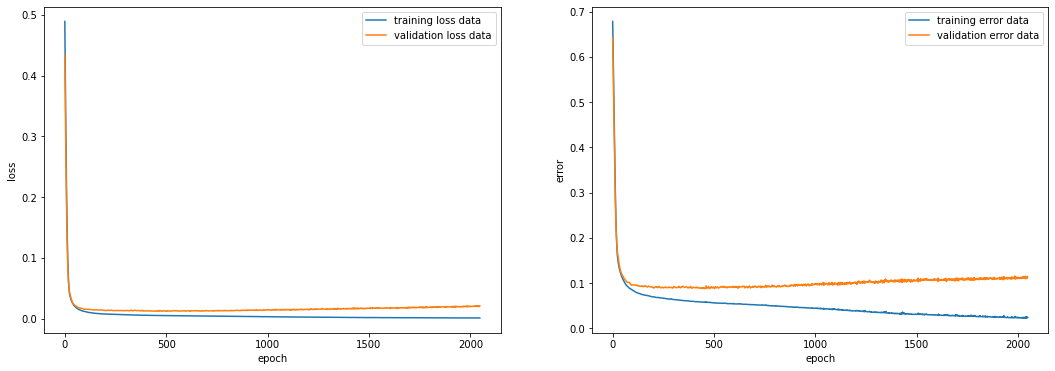

In [19]:
modelA.evaluate(XVALID, YVALID)
print("Last Val Loss: %s" % historyA.history['val_loss'][-1])
print("Last Val MAE: %s" % historyA.history['val_mean_absolute_error'][-1])
print(historyA.params)
learning_curves(historyA)

## Model B
* Hidden layers with smaller neuron counts

In [0]:
modelB = Sequential()
modelB.add(Dense(7, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelB.add(Dense(3, activation='relu'))
modelB.add(Dense(1, activation='linear'))

In [0]:
# Normal Dataset
modelB.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyB = modelB.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 2048, batch_size=100, verbose=0)

### Learning Curves of Model B

90/90 [==============================] - 0s 94us/sample - loss: 0.0150 - mean_absolute_error: 0.0910
Last Val Loss: 0.01496064942330122
Last Val MAE: 0.09095633
{'batch_size': 100, 'epochs': 2048, 'steps': None, 'samples': 213, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']}


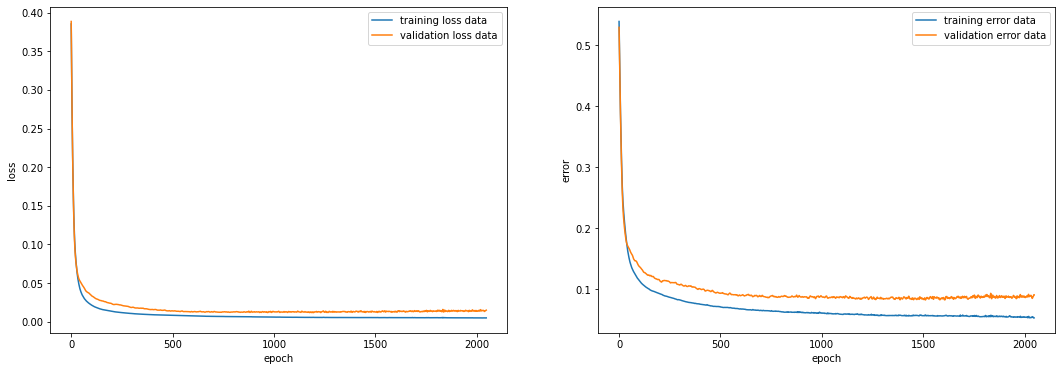

In [22]:
modelB.evaluate(XVALID, YVALID)
print("Last Val Loss: %s" % historyB.history['val_loss'][-1])
print("Last Val MAE: %s" % historyB.history['val_mean_absolute_error'][-1])
print(historyB.params)
learning_curves(historyB)

## Final Evaluation

In [23]:
print(model.evaluate(XVALID, YVALID))
print(model1.evaluate(XVALID, YVALID))
print(model2.evaluate(XVALID, YVALID))
print(modelA.evaluate(XVALID, YVALID))
print(modelB.evaluate(XVALID, YVALID))

90/90 [==============================] - 0s 129us/sample - loss: 0.0159 - mean_absolute_error: 0.1028
[0.015857140471537908, 0.10280429]
90/90 [==============================] - 0s 98us/sample - loss: 0.0242 - mean_absolute_error: 0.1130
[0.024174276780751017, 0.11300625]
90/90 [==============================] - 0s 99us/sample - loss: 0.0251 - mean_absolute_error: 0.1268
[0.025111995016535122, 0.1268212]
90/90 [==============================] - 0s 87us/sample - loss: 0.0210 - mean_absolute_error: 0.1145
[0.021025887007514635, 0.11447628]
90/90 [==============================] - 0s 91us/sample - loss: 0.0150 - mean_absolute_error: 0.0910
[0.014960648616154988, 0.09095633]
